In [1]:
from mean_nuc_mesh_from_data import *
import pandas

Load segmentation meshes and create mean mesh from them

In [2]:
# Uncomment below to download nucleus mesh database and save to csv
# df = create_csv_from_database()
# pd.to_csv(df, 'nucleus_data/nucleus_timelapse')

# Uncomment below to load saved dataset of individual meshes
df = pd.load('nucleus_data/nucleus_timelapse')

# Uncomment below to create mean nucleus mesh (includes saving mask to file)
get_mean_mesh_from_individual_meshes(df, imsize=200, dz=0.025)

Load pre-caluclated (as above) mean mesh and load vertices and faces, to save as stl file

In [9]:
# Uncomment below to load mean nucleus mask and get mean nucleus mesh
mask = np.load('nucleus_data/mean_nuc_mask.npy')
verts, faces = get_mean_mesh(mask, ss=17)
np.save('verts_'+str(verts.shape[0]), verts)
np.save('faces_'+str(verts.shape[0]), faces)

In [10]:
# Unommcent below to save mesh to stl file
save_mesh_as_stl(verts, faces, 'nucleus_data/mean_nuc_mesh_'+str(verts.shape[0]))

In [11]:
# Uncomment below to load stl mesh and get vertices
stlnuc = mesh.Mesh.from_file('nucleus_data/mean_nuc_mesh_'+str(verts.shape[0])+'.stl')
points = np.unique(stlnuc.vectors.reshape([int(stlnuc.vectors.size/3), 3]), axis=0)

Compare original and stl meshes

In [12]:
points

array([[ 57.168343, 102.      ,  98.6     ],
       [ 57.203922, 102.      ,  97.75    ],
       [ 57.2127  , 102.      ,  96.9     ],
       ...,
       [144.30042 ,  85.      ,  99.45    ],
       [144.33792 ,  85.      ,  98.6     ],
       [144.35225 ,  85.      ,  97.75    ]], dtype=float32)

In [13]:
verts

array([[ 67.69476,  68.     ,  85.85   ],
       [ 68.     ,  68.     ,  85.74649],
       [ 68.     ,  67.66751,  85.85   ],
       ...,
       [138.88594, 119.     , 108.8    ],
       [137.95607, 119.     , 109.65   ],
       [136.60866, 119.     , 110.5    ]], dtype=float32)

In [14]:
xp = [points[i][0] for i in range(points.shape[0])]
yp = [points[i][1] for i in range(points.shape[0])]
zp = [points[i][2] for i in range(points.shape[0])]

xv = [verts[i][0] for i in range(verts.shape[0])]
yv = [verts[i][1] for i in range(verts.shape[0])]
zv = [verts[i][2] for i in range(verts.shape[0])]

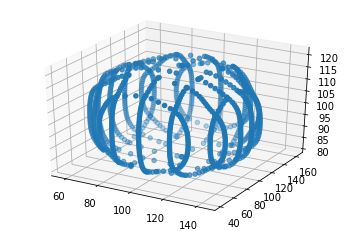

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xp,yp,zp)
plt.show()

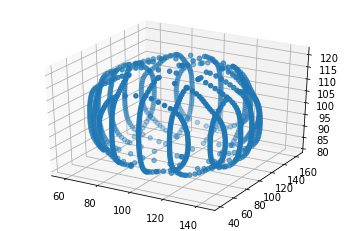

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xv,yv,zv)
plt.show()

In [18]:
np.sort(points)

array([[ 55.001743,  94.      ,  99.65    ],
       [ 55.001747,  94.      ,  99.4     ],
       [ 55.00519 ,  94.      ,  99.6     ],
       ...,
       [ 93.      ,  98.55    , 145.03387 ],
       [ 94.      ,  97.4     , 145.03442 ],
       [ 94.      ,  98.15    , 145.03583 ]], dtype=float32)

In [19]:
np.sort(verts)

array([[ 55.998417,  83.      ,  97.75    ],
       [ 56.      ,  83.      ,  97.74167 ],
       [ 56.      ,  82.99167 ,  97.75    ],
       ...,
       [ 94.      ,  98.9     , 145.00496 ],
       [ 94.      ,  98.95    , 145.00496 ],
       [ 95.      ,  97.4     , 145.00166 ]], dtype=float32)

In [22]:
max(xp)

145.03583

In [23]:
max(xv)

145.03583

In [25]:
np.save('mesh_vertices', verts)